## EDA IMF data


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from numpy import array
import re
from matplotlib.ticker import StrMethodFormatter

C:\Users\u61152\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Build a function to get the data from the IMF website and save it locally

URL = 'http://www.imf.org/external/pubs/ft/weo/2020/01/weodata/WEOApr2020all.xls'
def get_data_from_IMF(URL):
    urllib.request.urlretrieve(URL, '.')

#### WEOApr2020all

In [4]:
# Reading the dataset
imf = pd.read_excel("data/WEOApr2020all.xls", na_values=['--'])


In [5]:
imf.shape

(1554, 52)

In [6]:
# Let's take a look at the first few rows
imf.head(10)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
0,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,4.495,2018.0
1,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,Source: National Statistics Office Latest actu...,NaN,...,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,79.678,2018.0
2,512,AFG,NGDPRPPPPCPCH,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654,-4.291,3.063,2018.0
3,512,AFG,PCPIPCH,Afghanistan,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,7.386,4.674,-0.662,4.384,4.976,0.626,2.302,4.711,4.451,2018.0
4,512,AFG,PCPIEPCH,Afghanistan,"Inflation, end of period consumer prices",Annual percentages of end of period consumer ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,7.241,1.487,1.131,4.588,3.041,0.755,2.773,4.500,5.000,2018.0
5,512,AFG,LUR,Afghanistan,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,512,AFG,GGXCNL_NGDP,Afghanistan,General government net lending/borrowing,Net lending (+)/ borrowing (?) is calculated a...,Percent of GDP,NaN,Source: Ministry of Finance or Treasury Latest...,NaN,...,-0.631,-1.719,-1.378,0.118,-0.630,1.502,-0.983,-4.000,-2.007,2018.0
7,512,AFG,BCA_NGDPD,Afghanistan,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,Source: Various sources: Central Statistical O...,NaN,...,1.444,6.549,3.709,8.375,7.087,12.986,8.591,4.898,5.753,2018.0
8,914,ALB,NGDP_RPCH,Albania,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: IMF Staff Estimates Latest actual data...,2.684,...,1.002,1.774,2.219,3.315,3.802,4.071,2.214,-5.006,8.000,2018.0
9,914,ALB,PPPGDP,Albania,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,Source: IMF Staff Estimates Latest actual data...,5.563,...,30.398,31.510,32.545,33.972,35.928,38.301,39.832,38.078,41.926,2018.0


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [7]:
imf["Country"].unique().size

195

In [8]:
imf['Country'].astype('category').value_counts()

Zimbabwe           8
Egypt              8
Hong Kong SAR      8
Honduras           8
Haiti              8
                  ..
Oman               8
Norway             8
North Macedonia    8
Nigeria            8
Afghanistan        8
Name: Country, Length: 194, dtype: int64

In [9]:
imf['WEO Subject Code'].astype('category').value_counts()

PPPGDP           194
PCPIPCH          194
PCPIEPCH         194
NGDP_RPCH        194
NGDPRPPPPCPCH    194
LUR              194
GGXCNL_NGDP      194
BCA_NGDPD        194
Name: WEO Subject Code, dtype: int64

In [10]:
imf["WEO Subject Code"].unique()

array(['NGDP_RPCH', 'PPPGDP', 'NGDPRPPPPCPCH', 'PCPIPCH', 'PCPIEPCH',
       'LUR', 'GGXCNL_NGDP', 'BCA_NGDPD', nan], dtype=object)

In [11]:
imf['Subject Descriptor'].astype('category').value_counts()

Unemployment rate                                     194
Inflation, end of period consumer prices              194
Inflation, average consumer prices                    194
Gross domestic product, current prices                194
Gross domestic product, constant prices               194
Gross domestic product per capita, constant prices    194
General government net lending/borrowing              194
Current account balance                               194
Name: Subject Descriptor, dtype: int64

In [12]:
# Few years data are the OBJECT type, lets convert those into float
#df_obj = imf.select_dtypes(include=[object])
#cols = imf.select_dtypes([np.object]).columns
filteredColumns = imf.dtypes[imf.dtypes == np.object]
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)
#list(df_obj.columns)

['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country', 'Subject Descriptor', 'Subject Notes', 'Units', 'Scale', 'Country/Series-specific Notes']


In [13]:
imf = imf.iloc[:,:-1]
imf["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Gui

In [14]:
# Lets make a variable with more sensible meaning for indicators

imf["Economic_Indicator"] = imf["WEO Subject Code"].replace({
        'NGDP_RPCH':'GDP_cons_price(%)', 
        'PPPGDP':'GDP_current_prices(USD_Billion)', 
        'NGDPRPPPPCPCH':'GDP_PER_CAP_cons_price(%)', 
        'PCPIPCH':'Inflation_avg_consumer_prices(%)',
        'PCPIEPCH':'Inflation_eop_consumer prices(%)',
        'LUR':'Unemployment_rate(%)',
        'GGXCNL_NGDP': 'lending/borrowing(GDP%)',
        'BCA_NGDPD':'Current_account_balance(GDP%)'
         })
imf["Economic_Indicator"].unique()

array(['GDP_cons_price(%)', 'GDP_current_prices(USD_Billion)',
       'GDP_PER_CAP_cons_price(%)', 'Inflation_avg_consumer_prices(%)',
       'Inflation_eop_consumer prices(%)', 'Unemployment_rate(%)',
       'lending/borrowing(GDP%)', 'Current_account_balance(GDP%)', nan],
      dtype=object)

In [15]:
# check for NAN value
imf.isnull().sum()

WEO Country Code                    1
ISO                                 2
WEO Subject Code                    2
Country                             2
Subject Descriptor                  2
Subject Notes                       2
Units                               2
Scale                            1360
Country/Series-specific Notes      87
1980                              730
1981                              668
1982                              656
1983                              645
1984                              639
1985                              625
1986                              619
1987                              612
1988                              599
1989                              589
1990                              535
1991                              491
1992                              441
1993                              371
1994                              352
1995                              309
1996                              282
1997        

In [16]:
# we can notice some tail comments appended in last of the data file, lets remove
imf.drop(imf.loc[imf['ISO']==0].index, inplace=True)
imf.tail(2)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Economic_Indicator
1552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# check for missing values
# chek for unquie values
# check for data types

unique_values = imf.nunique()
filtered_empty = imf.isnull().sum(axis=0)
mis_val_percent = imf.isna().mean().round(4) * 100
data_type = imf.dtypes
val_table = pd.concat([unique_values,filtered_empty, mis_val_percent, data_type], axis=1,sort =True)
val_table_columns = val_table.rename(columns = {0: 'Unique', 1 : 'Missing Values', 2 : 'missing %', 3: 'type'})
val_table_columns = val_table_columns.sort_values('missing %', ascending=False)
val_table_columns 

,Unique,Missing Values,missing %,type
Scale,1,1360,87.52,object
1980,808,730,46.98,float64
1981,855,668,42.99,float64
1982,874,656,42.21,float64
1983,878,645,41.51,float64
1984,886,639,41.12,float64
1985,892,625,40.22,float64
1986,902,619,39.83,float64
1987,911,612,39.38,float64
1988,922,599,38.55,float64


In [18]:
# we can see so many nulls in old data & years for few countries, since database is not big lets impute with zero for now
# we might modify or delete this step based on our model performance

#imf = imf.fillna(0)

In [19]:
# Row wise Null
#imf.isnull().all(axis = 1).sum()

In [20]:
# Lets drop few columns on business justification as those are of no use in inference
# "Estimates Start After"
# "Subject Notes"
# "Country/Series-specific Notes"

In [21]:
imf.drop(['Subject Notes','Country/Series-specific Notes'] , axis=1, inplace=True)
imf.head(2)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Units,Scale,1980,1981,1982,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Economic_Indicator
0,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,...,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,4.495,GDP_cons_price(%)
1,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",Purchasing power parity; international dollars,Billions,NaN,NaN,NaN,...,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,79.678,GDP_current_prices(USD_Billion)


In [22]:
#imf = imf.select_dtypes(include ='float64') 
#imf.head()

In [23]:
# remove all the catagorical varible to plot
unique_values = imf.nunique()
filtered_empty = imf.isnull().sum(axis=0)
mis_val_percent = imf.isna().mean().round(4) * 100
data_type = imf.dtypes
val_table = pd.concat([unique_values,filtered_empty, mis_val_percent, data_type], axis=1,sort =True)
val_table_columns = val_table.rename(columns = {0: 'Unique', 1 : 'Missing Values', 2 : 'missing %', 3: 'type'})
val_table_columns = val_table_columns.sort_values('missing %', ascending=False)
val_table_columns 

,Unique,Missing Values,missing %,type
Scale,1,1360,87.52,object
1980,808,730,46.98,float64
1981,855,668,42.99,float64
1982,874,656,42.21,float64
1983,878,645,41.51,float64
1984,886,639,41.12,float64
1985,892,625,40.22,float64
1986,902,619,39.83,float64
1987,911,612,39.38,float64
1988,922,599,38.55,float64


In [24]:
imf["WEO Subject Code"].unique()

array(['NGDP_RPCH', 'PPPGDP', 'NGDPRPPPPCPCH', 'PCPIPCH', 'PCPIEPCH',
       'LUR', 'GGXCNL_NGDP', 'BCA_NGDPD', nan], dtype=object)

In [25]:
#so there is no use of subject code, we will use descriptor, lets remove code
#imf.drop(['WEO Subject Code'] , axis=1, inplace=True)
#there is no use of year 2021,since we have to predict it, lets remove
imf.drop([2021] , axis=1, inplace=True)

In [26]:
imf.head(2)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Units,Scale,1980,1981,1982,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Economic_Indicator
0,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,...,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,GDP_cons_price(%)
1,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",Purchasing power parity; international dollars,Billions,NaN,NaN,NaN,...,55.963,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,GDP_current_prices(USD_Billion)


In [27]:
# Now we will try to take each indicator one by one, lets rename subject descriptor to economy indicators
imf["Subject Descriptor"].unique()
#imf.rename(columns = {'Subject Descriptor':'Economic Indicator'}, inplace = True) 

array(['Gross domestic product, constant prices',
       'Gross domestic product, current prices',
       'Gross domestic product per capita, constant prices',
       'Inflation, average consumer prices',
       'Inflation, end of period consumer prices', 'Unemployment rate',
       'General government net lending/borrowing',
       'Current account balance', nan], dtype=object)

In [28]:
imf.head(2)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Units,Scale,1980,1981,1982,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Economic_Indicator
0,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,...,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,GDP_cons_price(%)
1,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",Purchasing power parity; international dollars,Billions,NaN,NaN,NaN,...,55.963,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,GDP_current_prices(USD_Billion)


In [29]:
imf = imf.drop(columns=['ISO','WEO Country Code','Units'])
imf.head()

,WEO Subject Code,Country,Subject Descriptor,Scale,1980,1981,1982,1983,1984,1985,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Economic_Indicator
0,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,GDP_cons_price(%)
1,PPPGDP,Afghanistan,"Gross domestic product, current prices",Billions,NaN,NaN,NaN,NaN,NaN,NaN,...,55.963,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,GDP_current_prices(USD_Billion)
2,NGDPRPPPPCPCH,Afghanistan,"Gross domestic product per capita, constant pr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.299,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654,-4.291,GDP_PER_CAP_cons_price(%)
3,PCPIPCH,Afghanistan,"Inflation, average consumer prices",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441,7.386,4.674,-0.662,4.384,4.976,0.626,2.302,4.711,Inflation_avg_consumer_prices(%)
4,PCPIEPCH,Afghanistan,"Inflation, end of period consumer prices",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.875,7.241,1.487,1.131,4.588,3.041,0.755,2.773,4.500,Inflation_eop_consumer prices(%)


In [30]:
imf["Subject Descriptor"].unique()

array(['Gross domestic product, constant prices',
       'Gross domestic product, current prices',
       'Gross domestic product per capita, constant prices',
       'Inflation, average consumer prices',
       'Inflation, end of period consumer prices', 'Unemployment rate',
       'General government net lending/borrowing',
       'Current account balance', nan], dtype=object)

In [31]:
data = imf.drop(columns=['Subject Descriptor','WEO Subject Code'])
data.head()

,Country,Scale,1980,1981,1982,1983,1984,1985,1986,1987,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Economic_Indicator
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,GDP_cons_price(%)
1,Afghanistan,Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.963,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,GDP_current_prices(USD_Billion)
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.299,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654,-4.291,GDP_PER_CAP_cons_price(%)
3,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441,7.386,4.674,-0.662,4.384,4.976,0.626,2.302,4.711,Inflation_avg_consumer_prices(%)
4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.875,7.241,1.487,1.131,4.588,3.041,0.755,2.773,4.500,Inflation_eop_consumer prices(%)


In [32]:
# Dropping scale column as it has too many NAN, And not have any business impact
imf = imf.drop(columns=['Scale', 'Subject Descriptor', 'WEO Subject Code'])
#'WEO Country Code' 'Subject Notes' 'Units'\n 'Country/Series-specific Notes
imf.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Economic_Indicator
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,GDP_cons_price(%)
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.963,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,GDP_current_prices(USD_Billion)
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.299,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654,-4.291,GDP_PER_CAP_cons_price(%)
3,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441,7.386,4.674,-0.662,4.384,4.976,0.626,2.302,4.711,Inflation_avg_consumer_prices(%)
4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.875,7.241,1.487,1.131,4.588,3.041,0.755,2.773,4.500,Inflation_eop_consumer prices(%)


In [33]:
# This is just for visulisation visualization
# create a pivot with the columns with years
data1 = imf.iloc[:,1:-1]
data2 = pd.concat((imf["Country"],imf["Economic_Indicator"]), axis=1)
imf_pivot = pd.concat((data2, data1), axis=1)
imf_pivot = imf_pivot.set_index(['Country','Economic_Indicator'])
imf_pivot = imf_pivot.stack()
imf = imf_pivot.unstack(1).reset_index()
imf.rename(columns={"level_1": "Year"}, inplace=True)
imf.head(20)

Economic_Indicator,Country,Year,Current_account_balance(GDP%),GDP_PER_CAP_cons_price(%),GDP_cons_price(%),GDP_current_prices(USD_Billion),Inflation_avg_consumer_prices(%),Inflation_eop_consumer prices(%),Unemployment_rate(%),lending/borrowing(GDP%)
0,Afghanistan,2002,33.908,NaN,NaN,18.835,NaN,NaN,NaN,-0.098
1,Afghanistan,2003,29.616,4.398,8.692,20.852,35.663,6.530,NaN,-2.102
2,Afghanistan,2004,37.216,-3.112,0.671,21.557,16.358,13.266,NaN,-2.393
3,Afghanistan,2005,30.226,8.042,11.830,24.858,10.569,10.562,NaN,-0.965
4,Afghanistan,2006,20.844,2.194,5.361,26.983,6.785,4.285,NaN,0.643
5,Afghanistan,2007,63.390,9.143,13.340,31.404,8.681,16.092,NaN,-2.492
6,Afghanistan,2008,33.769,1.286,3.863,33.252,26.419,18.814,NaN,-3.882
7,Afghanistan,2009,41.587,17.527,20.585,40.403,-6.811,-9.836,NaN,-1.779
8,Afghanistan,2010,29.430,5.431,8.438,44.323,2.179,10.246,NaN,0.922
9,Afghanistan,2011,26.574,3.234,6.479,48.180,11.804,9.312,NaN,-0.672


##### Interpolation of missing values 

In [34]:
imf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7246 entries, 0 to 7245
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           7246 non-null   object 
 1   Year                              7246 non-null   int64  
 2   Current_account_balance(GDP%)     6832 non-null   float64
 3   GDP_PER_CAP_cons_price(%)         7077 non-null   float64
 4   GDP_cons_price(%)                 7141 non-null   float64
 5   GDP_current_prices(USD_Billion)   7215 non-null   float64
 6   Inflation_avg_consumer_prices(%)  7113 non-null   float64
 7   Inflation_eop_consumer prices(%)  6660 non-null   float64
 8   Unemployment_rate(%)              3771 non-null   float64
 9   lending/borrowing(GDP%)           5587 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 566.2+ KB


In [35]:
imf.interpolate(method ='linear', limit_direction ='backward', limit = None) 

Economic_Indicator,Country,Year,Current_account_balance(GDP%),GDP_PER_CAP_cons_price(%),GDP_cons_price(%),GDP_current_prices(USD_Billion),Inflation_avg_consumer_prices(%),Inflation_eop_consumer prices(%),Unemployment_rate(%),lending/borrowing(GDP%)
0,Afghanistan,2002,33.908,4.398,8.692,18.835,35.663,6.530,5.028,-0.098
1,Afghanistan,2003,29.616,4.398,8.692,20.852,35.663,6.530,5.028,-2.102
2,Afghanistan,2004,37.216,-3.112,0.671,21.557,16.358,13.266,5.028,-2.393
3,Afghanistan,2005,30.226,8.042,11.830,24.858,10.569,10.562,5.028,-0.965
4,Afghanistan,2006,20.844,2.194,5.361,26.983,6.785,4.285,5.028,0.643
...,...,...,...,...,...,...,...,...,...,...
7241,Zimbabwe,2016,-3.580,-0.809,0.742,37.651,-1.558,-0.898,NaN,-6.242
7242,Zimbabwe,2017,-1.299,3.189,4.704,40.165,0.907,3.430,NaN,-8.113
7243,Zimbabwe,2018,-5.896,2.049,3.497,42.582,10.607,42.074,NaN,-4.499
7244,Zimbabwe,2019,1.133,-9.899,-8.276,39.739,255.292,521.150,NaN,-2.575


In [36]:
imf = imf.fillna(0)

In [37]:
# Save the clean data for future & modeling
imf.to_excel("./data/WEOApr2020all_clean.xls")

In [38]:
#Lets convert year to numeric for ploting
imf["Year"] = pd.to_numeric(imf["Year"])

In [39]:
imf.nlargest(195,['GDP_current_prices(USD_Billion)']).drop_duplicates('Country')

Economic_Indicator,Country,Year,Current_account_balance(GDP%),GDP_PER_CAP_cons_price(%),GDP_cons_price(%),GDP_current_prices(USD_Billion),Inflation_avg_consumer_prices(%),Inflation_eop_consumer prices(%),Unemployment_rate(%),lending/borrowing(GDP%)
1337,China,2020,0.545,0.872,1.181,27804.95,3.046,0.953,4.300,-11.228
6939,United States,2019,-2.326,1.842,2.334,21427.68,1.812,1.902,3.667,-5.782
2863,India,2020,-0.592,0.548,1.871,11321.28,3.342,2.734,0.000,-7.422
3172,Japan,2019,3.617,0.897,0.654,5711.93,0.477,0.478,2.358,-2.825
2329,Germany,2019,7.146,0.322,0.565,4443.57,1.346,1.530,3.158,1.449
5301,Russia,2019,3.822,1.385,1.336,4389.96,4.470,3.046,4.600,1.934
2904,Indonesia,2020,-3.169,-0.504,0.499,3778.13,2.870,3.092,7.500,-5.010
854,Brazil,2019,-2.690,0.338,1.133,3480.55,3.733,4.306,11.925,-6.017
6898,United Kingdom,2019,-3.782,0.754,1.409,3162.41,1.791,1.415,3.825,-2.080
2218,France,2019,-0.758,1.179,1.310,3061.82,1.300,1.623,8.450,-3.015


In [40]:
imf_2020 = imf.loc[imf['Year'] == 2020]
imf_2020.head()

Economic_Indicator,Country,Year,Current_account_balance(GDP%),GDP_PER_CAP_cons_price(%),GDP_cons_price(%),GDP_current_prices(USD_Billion),Inflation_avg_consumer_prices(%),Inflation_eop_consumer prices(%),Unemployment_rate(%),lending/borrowing(GDP%)
18,Afghanistan,2020,4.898,-4.291,-3.007,74.792,4.711,4.500,0.000,-4.000
59,Albania,2020,-11.226,-4.854,-5.006,38.078,2.390,2.600,11.800,-5.393
100,Algeria,2020,-18.278,-6.907,-5.157,638.363,3.500,3.300,15.091,-14.952
141,Angola,2020,-6.719,-4.246,-1.374,199.329,20.719,20.979,0.000,-5.978
182,Antigua and Barbuda,2020,-25.567,-11.321,-9.998,2.506,1.443,1.348,0.000,-9.460


In [41]:
imf_2020_indicators = imf_2020.sort_values(['GDP_current_prices(USD_Billion)'], ascending=False).drop_duplicates('Country').head(20)
#imf_2020_indicators.drop(['Economic_Indicator'] , axis=1, inplace=True)
#imf_2020_indicators

In [42]:
#imf.nlargest(195,['GDP_current_prices(USD_Billion)']).drop_duplicates('Country')

In [43]:
imf_2020_gdp = imf_2020_indicators[['Country', 'GDP_current_prices(USD_Billion)']]
imf_2020_gdp.head(22)

Economic_Indicator,Country,GDP_current_prices(USD_Billion)
1337,China,27804.95
6940,United States,20289.99
2863,India,11321.28
3173,Japan,5451.45
5302,Russia,4176.35
2330,Germany,4160.93
2904,Indonesia,3778.13
855,Brazil,3316.92
6899,United Kingdom,2975.56
2219,France,2860.02


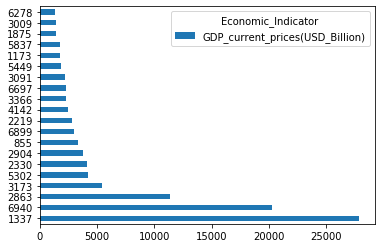

In [44]:
imf_2020_gdp.plot(kind='barh')
#ax = imf_2020.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [45]:
def plottop20_indicators(subset, indicator):
    ax = subset.set_index('Country').plot(kind='barh', figsize=(10, 12), color='#9ca99f', zorder=2, width=0.85)

    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    ax.set_xlabel(indicator, labelpad=20, weight='bold', size=12)

    # Set y-axis label
    ax.set_ylabel("TOP 20 countries", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    ax.invert_yaxis()

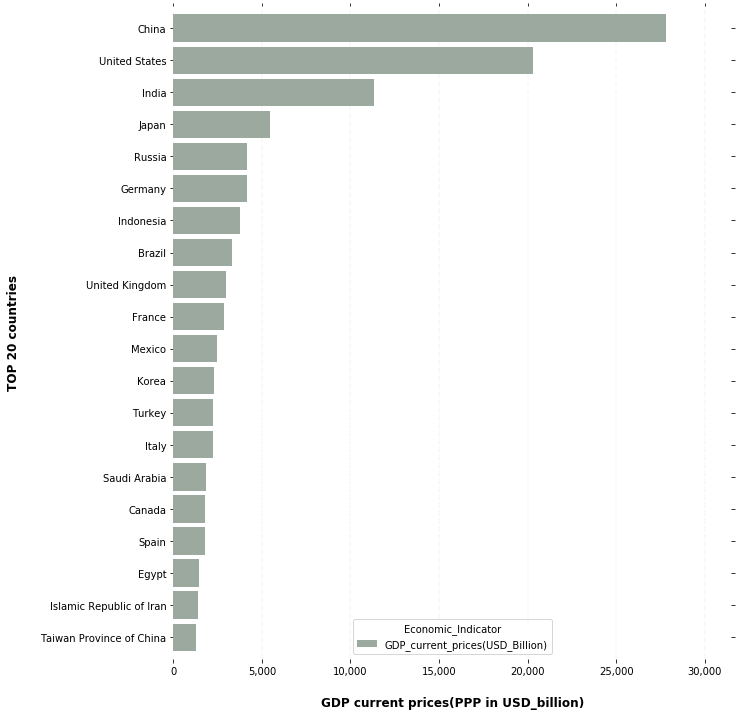

In [46]:
plottop20_indicators(imf_2020_gdp,"GDP current prices(PPP in USD_billion)")

In [47]:
imf_2020_const_gdp = imf_2020_indicators[['Country', 'GDP_PER_CAP_cons_price(%)']]

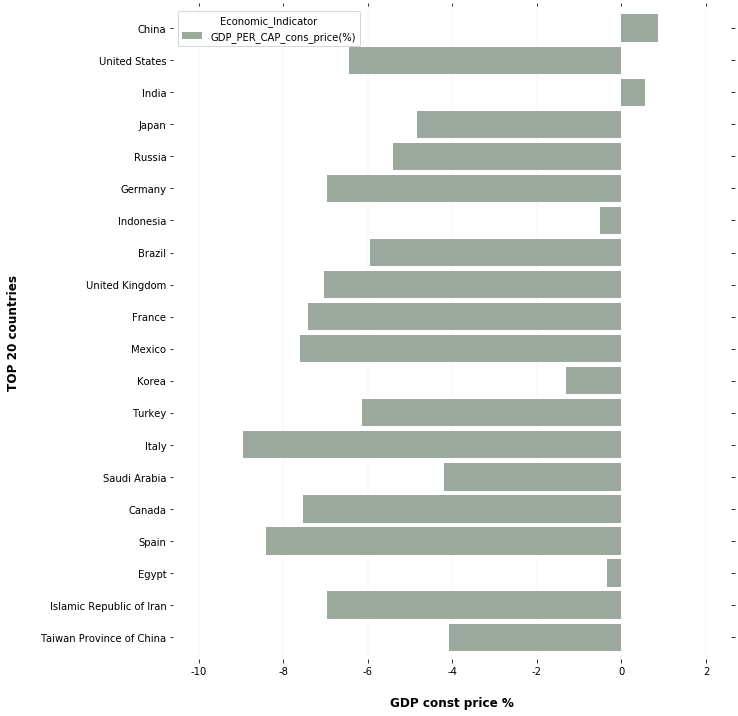

In [48]:
plottop20_indicators(imf_2020_const_gdp,"GDP const price %")

In [49]:
imf_2020_avg_con_price = imf_2020_indicators[['Country', 'Inflation_avg_consumer_prices(%)']]

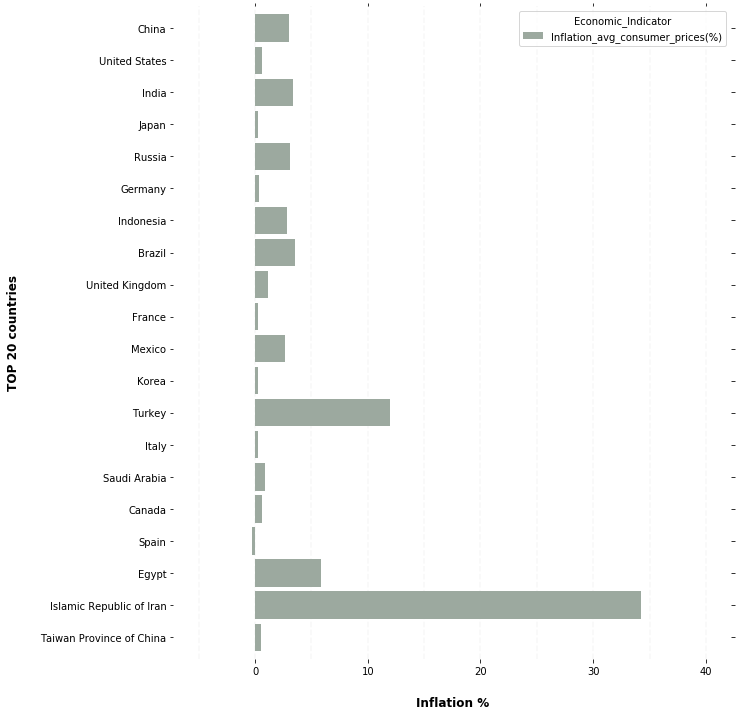

In [50]:
plottop20_indicators(imf_2020_avg_con_price,"Inflation %")

In [51]:
imf_2020_unemployment = imf_2020_indicators[['Country', 'Unemployment_rate(%)']]

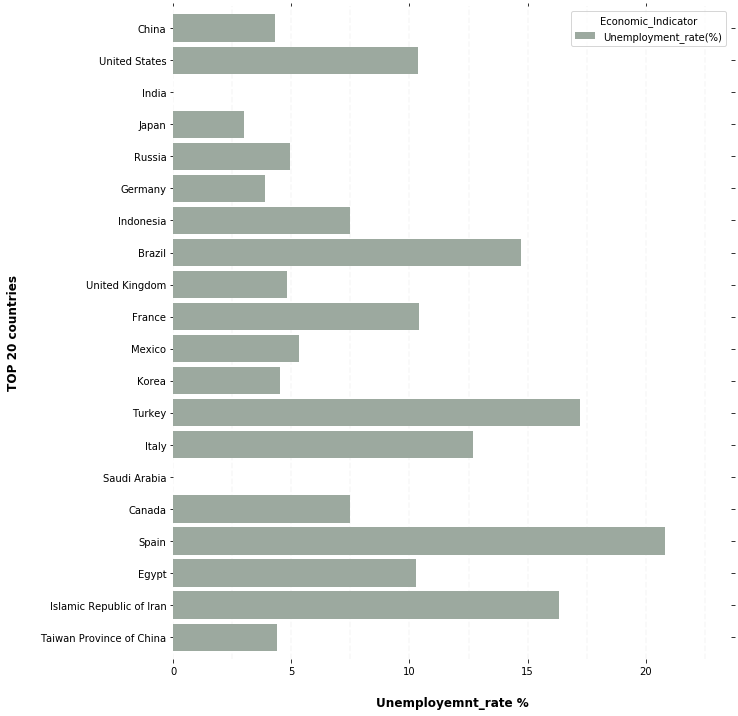

In [52]:
plottop20_indicators(imf_2020_unemployment,"Unemployemnt_rate %")

In [53]:
imf

Economic_Indicator,Country,Year,Current_account_balance(GDP%),GDP_PER_CAP_cons_price(%),GDP_cons_price(%),GDP_current_prices(USD_Billion),Inflation_avg_consumer_prices(%),Inflation_eop_consumer prices(%),Unemployment_rate(%),lending/borrowing(GDP%)
0,Afghanistan,2002,33.908,0.000,0.000,18.835,0.000,0.000,0.0,-0.098
1,Afghanistan,2003,29.616,4.398,8.692,20.852,35.663,6.530,0.0,-2.102
2,Afghanistan,2004,37.216,-3.112,0.671,21.557,16.358,13.266,0.0,-2.393
3,Afghanistan,2005,30.226,8.042,11.830,24.858,10.569,10.562,0.0,-0.965
4,Afghanistan,2006,20.844,2.194,5.361,26.983,6.785,4.285,0.0,0.643
...,...,...,...,...,...,...,...,...,...,...
7241,Zimbabwe,2016,-3.580,-0.809,0.742,37.651,-1.558,-0.898,0.0,-6.242
7242,Zimbabwe,2017,-1.299,3.189,4.704,40.165,0.907,3.430,0.0,-8.113
7243,Zimbabwe,2018,-5.896,2.049,3.497,42.582,10.607,42.074,0.0,-4.499
7244,Zimbabwe,2019,1.133,-9.899,-8.276,39.739,255.292,521.150,0.0,-2.575


In [54]:
def linechart(country,variable,init=1980,final=2020):
    plt.plot(imf["Year"][(imf["Year"]>=init) & 
                           (imf["Year"]<=final)].unique(), 
                           imf[variable][(imf['Country']==country) & 
                           (imf["Year"]>=init) & (imf["Year"]<=final)])
    plt.show()

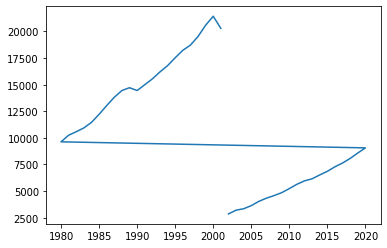

In [55]:
linechart('United States', 'GDP_current_prices(USD_Billion)')

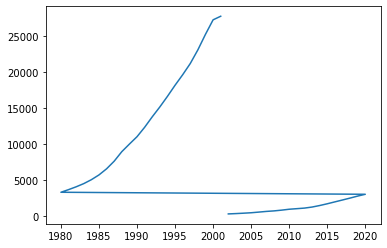

In [56]:
linechart('China', 'GDP_current_prices(USD_Billion)')

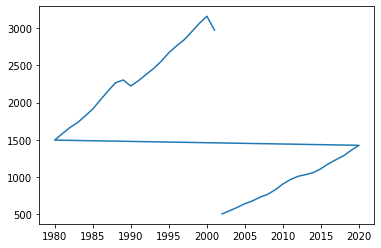

In [57]:
linechart('United Kingdom', 'GDP_current_prices(USD_Billion)')